# CLIP Implementation 

source: https://github.com/openai/CLIP/blob/main/notebooks/Interacting_with_CLIP.ipynb

In [1]:
%pip install pytorch
%pip install transformers
%pip install ftfy regex tqdm
%pip install git+https://github.com/openai/CLIP.git

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/5z/r4kns5fj5w1fkrz4hcmk_4h00000gp/T/pip-install-yfro399m/pytorch_7ac5b5e3871e43bbbad5df853ff8cd56/setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
  Running setup.py install for pytorch ... error
  error: subprocess-exited-with-error
  
  × Running setup.py insta

In [2]:
import numpy as np
import torch
from pkg_resources import packaging

print("Torch version:", torch.__version__)

Torch version: 1.13.0


In [3]:
import clip

# clip.available_models() # shows the available pre-trained CLIP models

Downloading:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/568 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/862k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

{'a photo of a cat': 0.0026157321, 'a photo of a dog': 0.99738425}
{'a photo of a cat': 0.992879, 'a photo of a dog': 0.007121092}
{'a photo of a short-legs dog': 0.018047504, 'a photo of a husky': 3.0989122e-05, 'a photo of a golden dog': 0.98192143}
{'a photo of a short-legs dog': 0.051324837, 'a photo of a husky': 0.9483797, 'a photo of a golden dog': 0.00029558068}


In [ ]:
model, preprocess = clip.load("ViT-B/32")
model.cuda().eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

# CLIP Implementation #2 

source: https://huggingface.co/openai/clip-vit-base-patch32

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


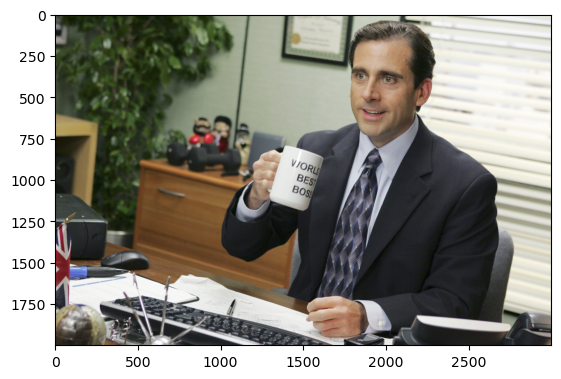

a photo of a mug
tensor([[0.0506, 0.9455, 0.0039]], grad_fn=<SoftmaxBackward0>)


In [22]:
url = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/the-office-cast-steve-carell-1606238652.jpg"
image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)
plt.show()

nouns = ["a photo of a laptop","a photo of a mug", "a photo of a sandwich"]
inputs = processor(text=nouns, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilitie
print(nouns[probs.argmax()])

print(probs)

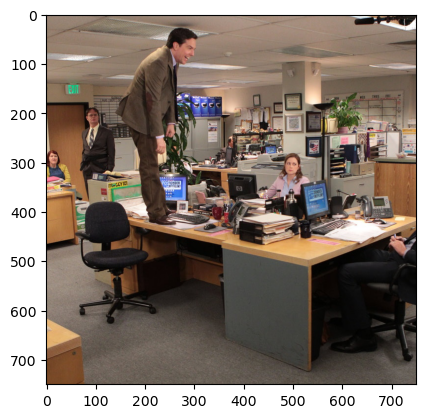

a photo of a laptop
tensor([[0.3568, 0.0275, 0.4834, 0.1323]], grad_fn=<SoftmaxBackward0>)


In [27]:
url = "https://img.nbc.com/sites/nbcunbc/files/styles/750x750/public/scet/photos/22/13305/NUP_155154_0465.JPG?itok=fnRPxYjU"
image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)
plt.show()

nouns = ["a photo of a computer","a photo of a mug", "a photo of a laptop", "a photo of a telephone"]
inputs = processor(text=nouns, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilitie
print(nouns[probs.argmax()])

print(probs)